In [37]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv("data.csv")

In [13]:
seller_sales = df.groupby('seller_id').agg(
    total_orders=('order_id', 'nunique'),
    total_items_sold=('order_item_id', 'count'),
    total_sales_value=('price', 'sum')
).reset_index()
 


We calculated each seller’s total number of unique orders, items sold, and revenue earned.

Used groupby on seller_id with aggregations: nunique, count, and sum.

This helps identify top-performing sellers in the marketplace.

In [14]:
seller_delivery = df.groupby('seller_id').agg(
    avg_delivery_time_days=('delivery_time_days', 'mean'),
    avg_delay_vs_estimate=('delay_vs_estimate', 'mean'),
    late_delivery_rate=('is_late', 'mean')  # optional, in %
).reset_index()


We analyzed delivery performance by calculating average delivery time and delay for each seller.

Also calculated late_delivery_rate as a percentage of delayed orders.

These metrics help evaluate seller reliability and timeliness.

In [15]:
seller_df = seller_sales.merge(seller_delivery, on='seller_id', how='left')


Merged seller sales data (revenues, order counts) with delivery performance metrics.
This unified table allows us to rank sellers based on both financial and logistics metrics.
Next, we’ll identify top performers and red flags based on these KPIs.

In [19]:
seller_df = df.groupby('seller_id').agg(
    total_orders=('order_id', 'nunique'),
    total_revenue=('total_order_value', 'sum'),
    avg_delay_vs_estimate=('delay_vs_estimate', 'mean'),
    late_deliveries=('is_late', 'sum'),
    fast_shipping=('is_fast_shipping', 'sum')
).reset_index()

seller_df['late_delivery_rate'] = seller_df['late_deliveries'] / seller_df['total_orders']
seller_df['fast_shipping_rate'] = seller_df['fast_shipping'] / seller_df['total_orders']



In [20]:
top10_revenue = seller_df.sort_values(by='total_revenue', ascending=False).head(10)
top10_revenue[['seller_id', 'total_revenue', 'total_orders']]


,seller_id,total_revenue,total_orders
825,4869f7a5dfa277a7dca6462dcf3b52b2,247007.06,1124
973,53243585a1d6dc2643021fd1853d8905,230797.02,348
849,4a3ca9315b744ce9f8e9374361493884,230113.12,1763
1463,7c67e1448b00f6e969d365cea6b010ab,227208.37,944
2867,fa1c13f2614d7b5c4749cbc52fecda94,198447.95,571
2511,da8622b14eb17ae2831f4ac5b9dab84a,184706.78,1311
1487,7e93a43ef30c4f03f38b393420bc753a,171973.55,319
182,1025f0e2d44d7041d6cf58b6550e0bfa,171924.96,910
1433,7a67c85e85bb2ce8582c35f2203ad736,160278.52,1145
1740,955fee9216a65b617aa5c0531780ce60,156606.48,1261


In [21]:
top10_late = seller_df.sort_values(by='late_delivery_rate', ascending=False).head(10)
top10_late[['seller_id', 'late_delivery_rate', 'total_orders']]


,seller_id,late_delivery_rate,total_orders
2713,ec8463980a4e0ea9f8517aea1ed0c419,3.000000,2
1652,8d92f3ea807b89465643c219455e7369,2.333333,3
2815,f524ad65d7e0f1daab730ef2d2e86196,2.000000,1
1459,7c462184585ae80bd6e5774c62ce50f2,2.000000,1
1175,6524b847b982cd56bb5d4b02b776ee42,2.000000,1
472,2a50b7ee5aebecc6fd0ff9784a4747d6,2.000000,1
903,4e42581f08e8cfc7c090f930bac4552a,2.000000,1
1036,586a871d4f1221763fddb6ceefdeb95e,2.000000,1
1651,8d899e15a5925f097cca50faa49b15e3,1.500000,4
2709,ec2e006556300a79a5a91e4876ab3a56,1.500000,2


In [22]:
top10_fast = seller_df.sort_values(by='fast_shipping_rate', ascending=False).head(10)
top10_fast[['seller_id', 'fast_shipping_rate', 'total_orders']]


,seller_id,fast_shipping_rate,total_orders
1785,99a25c39b28a74d1151c35c18d178292,6.000000,1
1893,a3b42d266fa8afc874b909422ce88582,6.000000,1
1055,5a4236931428800e9d9cc04af0987118,3.000000,1
317,1cbcd2ee0afb3fc09963b87eb65e7e4f,3.000000,1
1760,96f7c797de9ca20efbe14545bed63eec,3.000000,1
1496,7f5e4d5efad7e44b91115dd1decb65f3,2.666667,3
2643,e72b4feb7abe210c52aa667abc25a3a2,2.000000,1
1963,ab27bbbad5239bc31a34709275a70db4,2.000000,3
1952,aa2640d851ec322526f1295bbeb20092,2.000000,1
2175,bd65d163ded559eb90a10cd09fec178f,2.000000,1


### 🔝 Top 10 Seller Insights

- Sellers are ranked based on:
  - 💰 **Total Revenue**: Highest grossing sellers.
  - 🐢 **Late Delivery Rate**: Sellers with most delayed shipments.
  - ⚡ **Fast Shipping Rate**: Sellers who frequently deliver early.

These metrics help identify reliable sellers and performance gaps in the marketplace.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


C:\Users\vrush\AppData\Local\Temp\ipykernel_34064\4058550638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='seller_id', data=top10_revenue, palette='Blues_d')


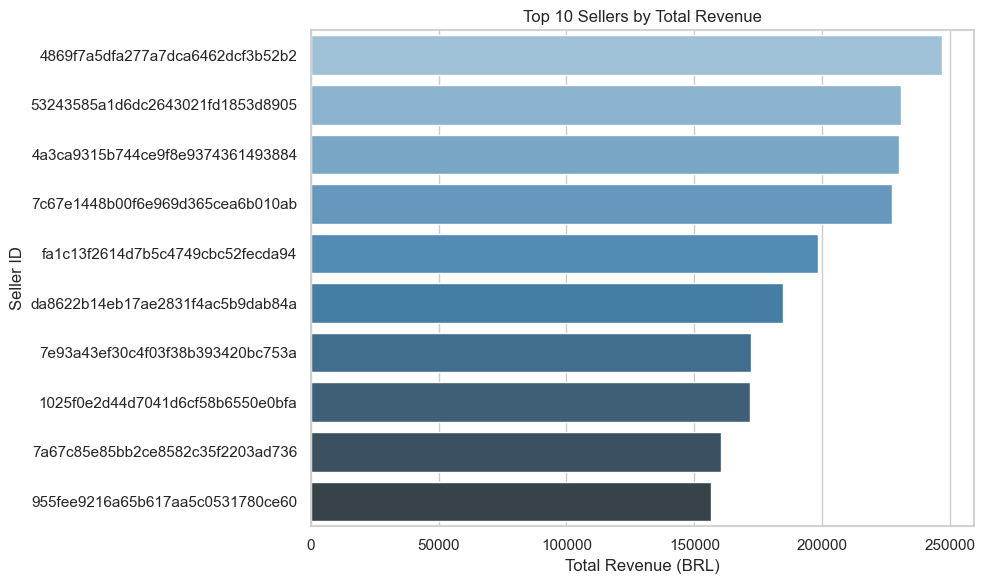

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='total_revenue', y='seller_id', data=top10_revenue, palette='Blues_d')
plt.title('Top 10 Sellers by Total Revenue')
plt.xlabel('Total Revenue (BRL)')
plt.ylabel('Seller ID')
plt.tight_layout()
plt.show()


C:\Users\vrush\AppData\Local\Temp\ipykernel_34064\1272628011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='late_delivery_rate', y='seller_id', data=top10_late, palette='Reds_d')


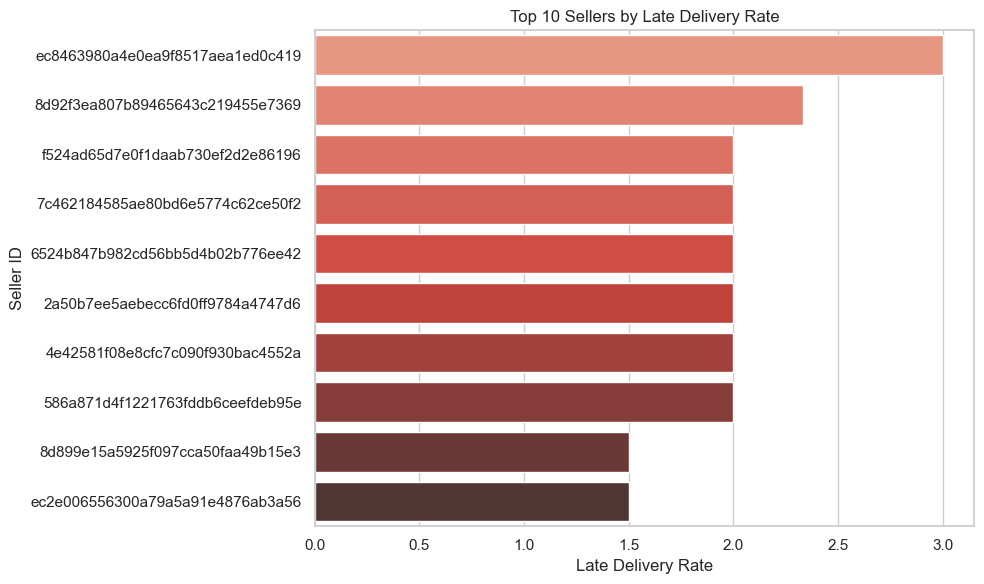

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='late_delivery_rate', y='seller_id', data=top10_late, palette='Reds_d')
plt.title('Top 10 Sellers by Late Delivery Rate')
plt.xlabel('Late Delivery Rate')
plt.ylabel('Seller ID')
plt.tight_layout()
plt.show()


C:\Users\vrush\AppData\Local\Temp\ipykernel_34064\3800326989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fast_shipping_rate', y='seller_id', data=top10_fast, palette='Greens_d')


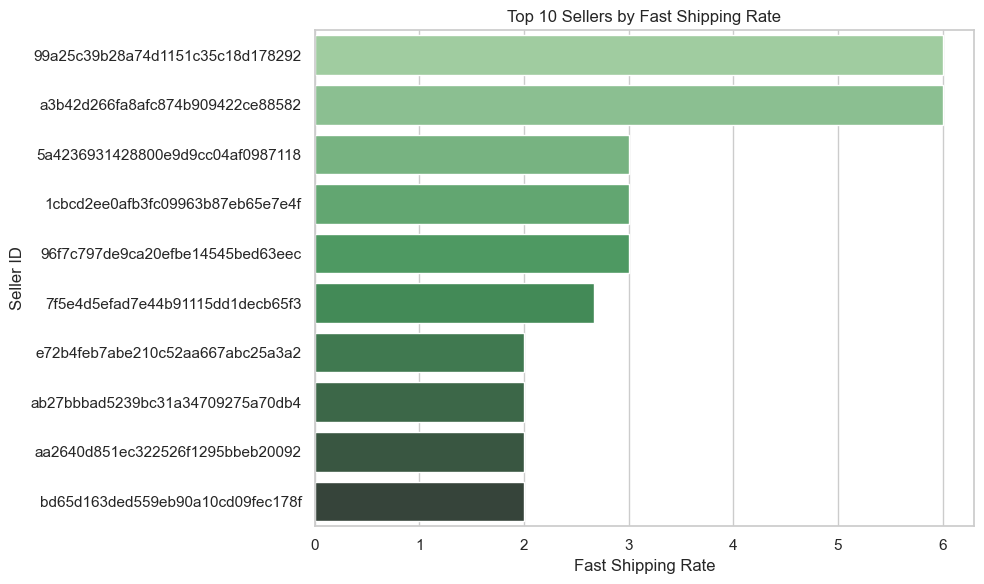

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='fast_shipping_rate', y='seller_id', data=top10_fast, palette='Greens_d')
plt.title('Top 10 Sellers by Fast Shipping Rate')
plt.xlabel('Fast Shipping Rate')
plt.ylabel('Seller ID')
plt.tight_layout()
plt.show()


### 📊 Seller Performance Analysis

We visualized performance of top sellers across three KPIs:

- **Top 10 by Revenue**: Identifies most profitable sellers.
- **Top 10 by Late Delivery Rate**: Flags sellers with poor delivery performance.
- **Top 10 by Fast Shipping Rate**: Highlights sellers offering excellent logistics.

These charts help e-commerce platforms identify both high-value and at-risk seller partners.


In [28]:
category_kpis = df.groupby('product_category_name').agg({
    'delivery_time_days': 'mean',
    'delay_vs_estimate': 'mean',
    'customer_wait_time': 'mean'
}).round(2).sort_values(by='customer_wait_time', ascending=False)

category_kpis.head(10)


,delivery_time_days,delay_vs_estimate,customer_wait_time
product_category_name,,,
moveis_escritorio,20.23,-11.89,20.23
moveis_colchao_e_estofado,16.92,-3.46,16.92
artigos_de_natal,15.30,-12.05,15.30
seguros_e_servicos,15.00,-17.00,15.00
fashion_calcados,14.93,-14.83,14.93
casa_conforto_2,14.38,-8.55,14.38
eletrodomesticos_2,13.43,-12.48,13.43
fashion_underwear_e_moda_praia,13.28,-10.93,13.28
ferramentas_jardim,13.25,-11.96,13.25


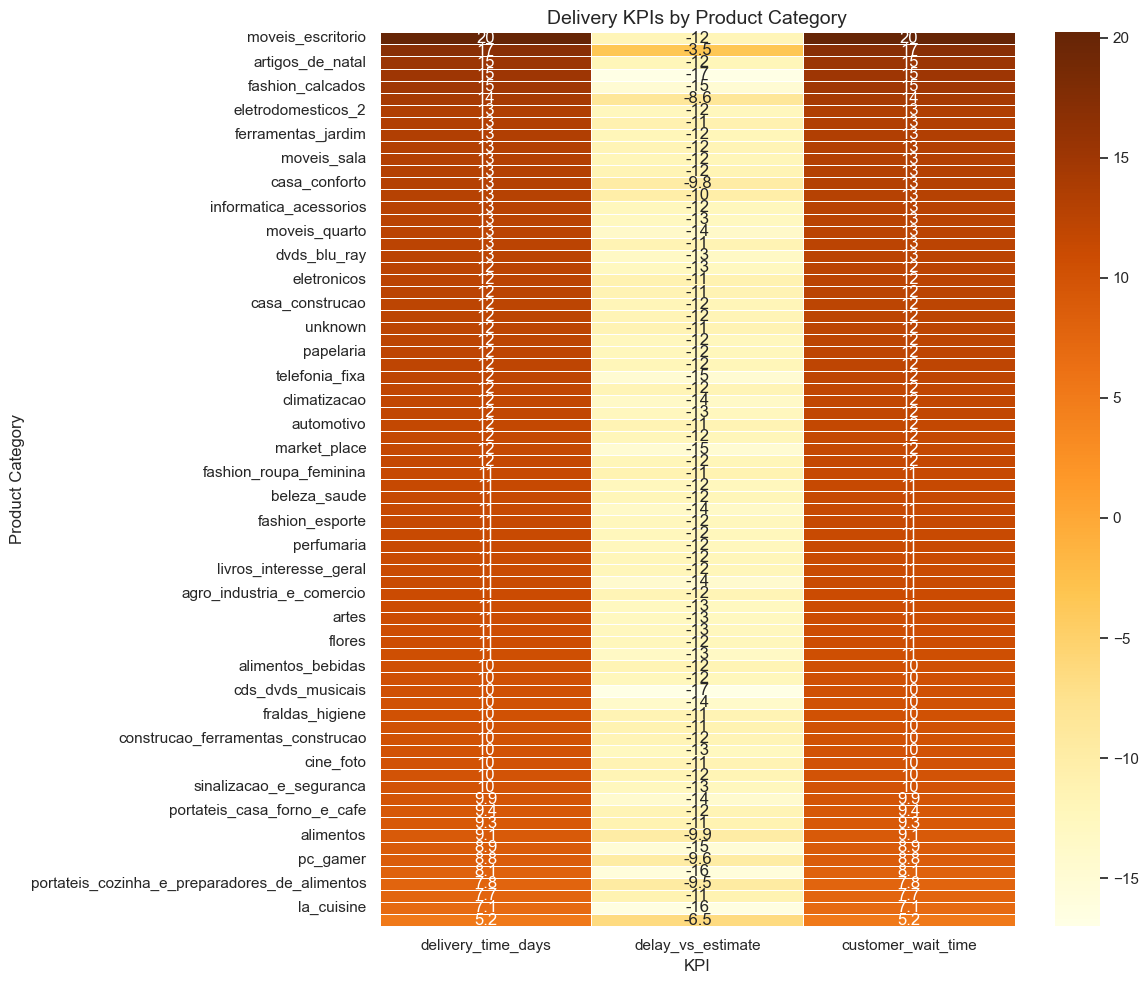

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(category_kpis, cmap='YlOrBr', linewidths=0.5, annot=True)
plt.title('Delivery KPIs by Product Category', fontsize=14)
plt.xlabel('KPI')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


### 🔥 Delivery KPIs by Product Category (Heatmap)

This heatmap shows how various product categories perform in terms of:

- **Delivery Time**: Average time from shipping to delivery.
- **Delay vs Estimate**: How early or late deliveries are, on average.
- **Customer Wait Time**: Time from purchase to delivery.

Insight: Certain categories like furniture or seasonal goods tend to have longer delays and wait times, guiding inventory and logistics strategy.


In [32]:
# 💡 Feature: Average product price per order
# Total price per order / total items per order

# Step 1: Group by order_id
order_totals = df.groupby('order_id').agg({
    'price': 'sum',
    'order_item_id': 'count'  # number of items in the order
}).rename(columns={
    'price': 'order_total_price',
    'order_item_id': 'total_items'
})

# Step 2: Calculate average price per item in the order
order_totals['avg_product_price_per_order'] = order_totals['order_total_price'] / order_totals['total_items']

# Step 3: Merge back to main DataFrame
df = df.merge(order_totals['avg_product_price_per_order'], on='order_id', how='left')

# 🔍 Preview
df[['order_id', 'price', 'avg_product_price_per_order']].head()


,order_id,price,avg_product_price_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,29.99,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,118.70,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,159.90,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,45.00,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,19.90,19.90


In [33]:
df['price_to_weight_ratio'] = df['price'] / df['product_weight_g']


In [34]:
df['price_to_weight_ratio'] = df.apply(
    lambda row: row['price'] / row['product_weight_g'] if row['product_weight_g'] != 0 else 0, axis=1
)


In [35]:
df['freight_share'] = df['freight_value'] / df['total_order_value']
df['freight_share'] = df['freight_share'].fillna(0)


In [38]:
df['product_density'] = df['product_weight_g'] / df['product_volume_cm3']
df['product_density'] = df['product_density'].replace([np.inf, -np.inf], 0).fillna(0)



In [39]:
items_per_order = df.groupby('order_id')['order_item_id'].count().reset_index()
items_per_order.columns = ['order_id', 'num_items']
df = df.merge(items_per_order, on='order_id', how='left')


In [40]:
df.to_csv('data.csv', index=False)
